# <center>Financial News Sentiment Analysis:  Supervised Machine Learning versus Lexicon</center>

# 1 Problem Area

The area of industry that I have chosen to apply natural language processing (NLP) text classification, in particular, sentiment anaylsis, is the financial sector. The challenge of sentiment analysis of financial market news lies at the intersection of NLP and financial analysis. It addresses the need to extract actionable insights from the vast amount of textual data generated daily in financial markets. Solving this problem is crucial for retail and institutional investors and traders who rely on timely and accurate information regarding the market's sentiment, in order to make informed decisions on their investments and trades.

One of the primary difficulties in this domain is the complexity and ambiguity of financial language. Stock market news articles for example, often contain nuanced sentiments, speculative language, and domain and region specific terminology that can be challenging for sentiment analysis models. For instance, words like "bullish" and "bearish", carry different meanings depending on context.

To tackle this challenge, researchers and practitioners have developed various text classification methods that leverage machine learning and NLP techniques. One of the key approaches is sentiment analysis, which aims to classify text into positive, negative, or neutral sentiments based on the underlying emotions expressed.

Prior work in this area has laid the foundation for sentiment analysis in financial texts. Researchers have explored different features and algorithms to improve sentiment classification accuracy. For example, sentiment lexicons specific to financial terms have been developed to enhance the understanding of sentiment-bearing words in financial contexts[1].

On top of that, recent advancements in deep learning, particularly with techniques like recurrent neural networks (RNNs) and transformer models, have shown promise in improving sentiment analysis accuracy by capturing dependencies in text[2].

In summary, the problem of sentiment analysis in financial market news presents a critical area where text classification methods can significantly contribute to the decisions investors and traders make. By building upon prior work in sentiment analysis and leveraging NLP techniques, I hope that my work can add to the importance of NLP in this sector.

# 2 Objectives

The objectives of building an NLP Text Classifier for analyzing financial market news sentiment are as follows:

 - <b><u>Objective 1:</u></b> Compare the performance between Supervised Learning versus Lexicon Approach:
 
     <u>Justification</u>: Majority of the publicly available literature on the subject of comparing financial sentiment anaylsis using Lexicon versus Machine Learning, is based off the VADER Lexicon. The VADER lexicon is a rule-based sentiment analysis tool designed to analyze the sentiment of texts by assigning polarity scores to words based on their context and intensity. However, I believe VADER is a poor choice for financial headlines, as it excels at classifying social media texts, and not the nuanced language of finance. 
     
     This comparitve study of Lexicon and Machine Learning for sentiment analysis, uses the VADER Lexicon and the dataset comprising of hotel reviews[3]. Thus, we cannot use the finding in presented in that work, to support this project, as it is not related to finance. Another study done on Sentiment Analysis of Financial News, using VADER once again, on an unlabelled dataset scraped from the web[4]. The results of the study tries to predict stock market movement, and does not address whether the sentiment predicted was correct in the first place, as the dataset was scraped from the web and unlabelled. Hence, I wish to make a comparive assessment between a lexicon catered towards finance, and a supervised machine learning model.    
     
     <br>

  - <b><u>Objective 2:</u></b> Sentiment Classification Accuracy: To develop an accurate sentiment analysis model specifically tailored for financial market news. This involves training a classifier that can effectively identify and categorize sentiment expressions in financial texts, including nuanced sentiments related to market trends, investor sentiment, and economic indicators.
  
    <u>Justification</u>: Accurate sentiment classification is essential for investors and traders to make informed decisions, especially in the volatile markets we are experiencing now in 2024. A reliable sentiment analysis model can help identify market sentiment shifts, assess investor sentiment towards specific stocks or sectors, and gauge the overall market mood.



    
The impact and significance of this project within the problem area of financial news sentiment analysis are as follows:

- Improved Decision-Making: The findings of this project can contribute to ascertain whether a lexicon based approach to classifying financial news is better than machine learning. Should machine learning perform better, an accurate sentiment analysis model can significantly improve decision-making processes for investors and traders by providing actionable insights and overall market trends. Whilst the lexicon approach can provide the same level of aid, whilst being less computational expensive, with a lower degree of a learning curve.

The novelty and ambition of this project stem from the fact that the majority of published studies focus on either using Lexicon or Machine Learning, and not comparing both simultaneously, often with datasets that are not labeled financial news headlines. There is only one major publicly available work that directly compares the performance of machine learning and financial lexicons[5]. This project aims to contribute significantly to this comparison in the field of sentiment analysis for financial news, bridging the gap between these two approaches and providing valuable insights into their respective strengths and weaknesses.

# 3 Dataset

The chosen dataset for this project comes from Kaggle[1]. The dataset comprises financial news headlines from the perspective of a retail investor, and is stored in a CSV file format, with a relatively small size of 657 kilobytes.

The dataset contains two columns:

- <b>Sentiment</b>: This column categorizes the sentiment of each news headline into three distinct types: positive, neutral, and negative. These sentiment labels serve as the known sentiment of the article headline.
<br>
<br>
- <b>News Headline</b>: This column contains the actual headlines of the news articles. It is textual data.

Both columns in the dataset are of string data type, which is common for text-based datasets in NLP tasks.

The labeled nature of this dataset makes it suitable for supervised machine learning approaches, which aligns with the project's objective of building a sentiment analysis classifier model. Supervised learning relies on having labeled data, where the features (in this case, the news headlines) are associated with corresponding labels (sentiments).

On overview of the dataset informs me that it may contain ambiguity, noise, special characters, or irregularities typical of real-world textual data. These aspects will need to be addressed through data preprocessing steps as part of the NLP pipeline. These preprocessing steps, which will be done in the later sections of this project, are crucial for preparing the dataset for feature extraction and building an effective sentiment analysis model.

# 4 Evaluation Methodology

To evaluate the classifier, the follow metrics will be used:

- <b>Accuracy Score</b>: It is how often a model is correct, overall.
- <b>Precision Score</b>: It is how often a model is correct at predicting the target class.
- <b>Confusion Matrix</b> A N*N matrix to evaluate a classfication model, where N is the number of labels.
    
We utilize the accuracy score to measure how well our classifier is at analyzing a given set of article headlines. The higher the score, the better. This means that the classifier is correctly predicting whether an article is positive, neutral or negative, and can be relied upon and trusted when asked to measure new unseen data.

We utilize the precision score to measure how well our classifier is at analyzing each of the given target classes. This will allows us to detect if our classifier is weaker at classifying positive headlines over negative headlines, for example, and investigate further as to the cause for it. The higher the precision score, the better. This will imply the classifier is good at predicting each of the 3 classes, respectively.

The confusion matrix will provide a general overview of the performance of the classifier for each of the 3 target classes, and is a common practise in the field of machine learning classification models.

# 5 Preprocessing 

## 5.1 Data Cleaning & Transformation

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import nltk
nltk.download('wordnet')
from nltk import FreqDist
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#import csv and load into pandas dataframe
df = pd.read_csv("all-data.csv",encoding='latin-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                           --------------  ----- 
 0   neutral                                                                                                                          4845 non-null   object
 1   According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [4]:
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


The file appears to not have the actual column headings mentioned in '3 Dataset'. Lets address that first.

In [5]:
#extract the false formated column values
firstEntry = list(df.columns)

In [6]:
#MY ORIGINAL CODE/CONTRIBUTIONS

#rename columns
df = df.rename(columns={'neutral':'sentiment',
                        'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'Headline'})

#append a new single row
addRow = {'sentiment':firstEntry[0],'Headline':firstEntry[1]}
df = df._append(addRow,ignore_index=True)

In [7]:
#column value is now in the last row
df.tail()

,sentiment,Headline
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...
4844,negative,Sales in Finland decreased by 10.5 % in Januar...
4845,neutral,"According to Gran , the company has no plans t..."


In [8]:
df.describe()

,sentiment,Headline
count,4846,4846
unique,3,4838
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2879,2


Originally the file contained 4845 rows, but because we know that the first row was formatted as column headers, we renamed the columns, and added the back the extracted old header vaues. Thus, the row count increased by row, which is correct.

In [9]:
df.isnull().sum()

sentiment    0
Headline     0
dtype: int64

No missing values in our dataframe.

In the later sections of the project, a text classifier model will be built. To accomadate the model, I will tranform the labels into 3 numerical classes, whilst retainng the textual data of the headline to be processing by the model.

The 3 numerical classes will be:

<b>1</b>: positive sentiment

<b>0</b>: neutral sentiment

<b>-1</b>: negative sentiment

In [10]:
#MY ORIGINAL CODE/CONTRIBUTIONS

#replace the sentiment values based on condition
df['sentiment'] = df['sentiment'].apply(lambda val: {'positive': 1, 'neutral':0 ,'negative': -1}.get(val, ' '))

In [11]:
df.head()

,sentiment,Headline
0,0,Technopolis plans to develop in stages an area...
1,-1,The international electronic industry company ...
2,1,With the new production plant the company woul...
3,1,According to the company 's updated strategy f...
4,1,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


## 5.2 Text Normalization

Converting all text to ASCII and lowercase helps standardize the text and ensures that the model doesn't treat "the" and "The" as different tokens. This step is vital in tasks where the case of the text doesn't carry significant meaning, such as sentiment analysis.

Punctuation marks like commas, periods, exclamation marks, etc., typically do not contribute directly to sentiment analysis and can add noise to the data. Removing them can help the model focus on meaningful words and improve accuracy.

We also remove digits as they do not add value to analyzing sentiment as well.

So the first step in the normalization process is addressing these two agendas. Regular Expression and built in Python string methods will be used.

In [12]:
#MY ORIGINAL CODE/CONTRIBUTIONS

def ascii_lower(str_):
    #this regex removes characters that come after an apostrophe,eg apple's -> apple
    reg = re.sub(r"'[a-z]+",'',str_)
    x = reg.encode("ascii", "ignore").decode()
    x = x.lower()
    return x

def removeDigits(str_):
    #replace all special characters, that is, everything that isnt a letter or digit
    reg = re.sub(r'[^A-Za-z ]+','',str_)
    return reg

#apply our function to the headline column
df['Headline'] = df['Headline'].apply(ascii_lower)
df['Headline'] = df['Headline'].apply(removeDigits)

In [13]:
df.tail()

,sentiment,Headline
4841,0,rinkuskiai beer sales fell by per cent to m...
4842,-1,operating profit fell to eur mn from eur mn ...
4843,-1,net sales of the paper segment decreased to eu...
4844,-1,sales in finland decreased by in january wh...
4845,0,according to gran the company has no plans to...


The next step is our normalization process is to tokenize the headlines and remove common stopwords that add no value to the sentiment analysis. 

We also lemmatize our tokens to break them down into a more meaningful base form. This is known also as linguistically principled anaylsis. We choose this over stemming as stemming simply removes the last few characters to return a root word, and because the stock market news headlines can contain nuances statement that stemming cannot provide any value to.

For example, stemming "historical highs" would return "histori highs". Whereas lemmatization would return "historical highs". The word "historical" is of much more value than "histori", which is not a English word at all.

In [14]:
#MY ORIGINAL CODE/CONTRIBUTIONS

#we store our tokenized words from our headlines into a list, for visualization later
tokenizedData= []

#define lemmatization object
lt = WordNetLemmatizer()

#create our stopwords set
myStopWords = set(stopwords.words('english'))

def custom_tokenizer(headline):
    tokens = []
    for sent in sent_tokenize(headline):
        for word in word_tokenize(sent):
            if word not in myStopWords:
                tokenizedData.append(word)
                word = lt.lemmatize(word)
                tokens.append(word)
            
    newHeadline = ' '.join(tokens)
    return newHeadline

df['Updated_Headlines'] = df['Headline'].apply(custom_tokenizer)

In [15]:
df.head()

,sentiment,Headline,Updated_Headlines
0,0,technopolis plans to develop in stages an area...,technopolis plan develop stage area le square ...
1,-1,the international electronic industry company ...,international electronic industry company elco...
2,1,with the new production plant the company woul...,new production plant company would increase ca...
3,1,according to the company updated strategy for...,according company updated strategy year baswar...
4,1,financing of aspocomp s growth aspocomp is agg...,financing aspocomp growth aspocomp aggressivel...


We now have our updated headlines, where the textual data is in lowercase ascii, containing no digits and special characters, common stopwords removed and remaining words lemmatized. I will go ahead and drop the old headline column,

In [16]:
df = df.drop('Headline',axis=1)
df = df.rename(columns={'Updated_Headlines':'Headlines'})

## 5.3 Visualizing the data

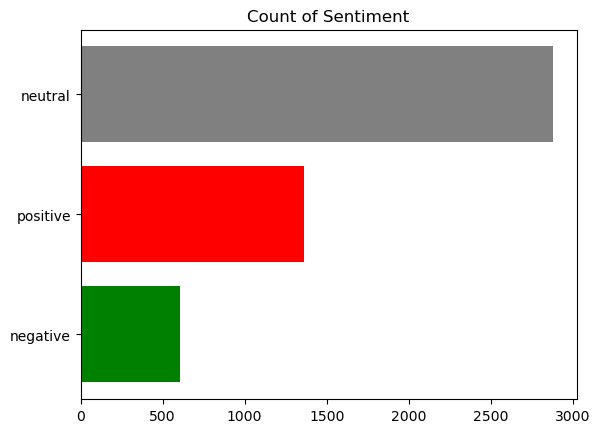

In [17]:
#MY ORIGINAL CODE/CONTRIBUTIONS

#plotting a bar chart with matplotlib
fig, ax = plt.subplots()

yAxisVal = ['neutral','positive','negative']
xAxisVal = df.sentiment.value_counts()
barColors = ['grey','red','green']

ax.barh(yAxisVal, xAxisVal, align='center',color=barColors)
ax.invert_yaxis()
ax.set_title('Count of Sentiment')

plt.show()

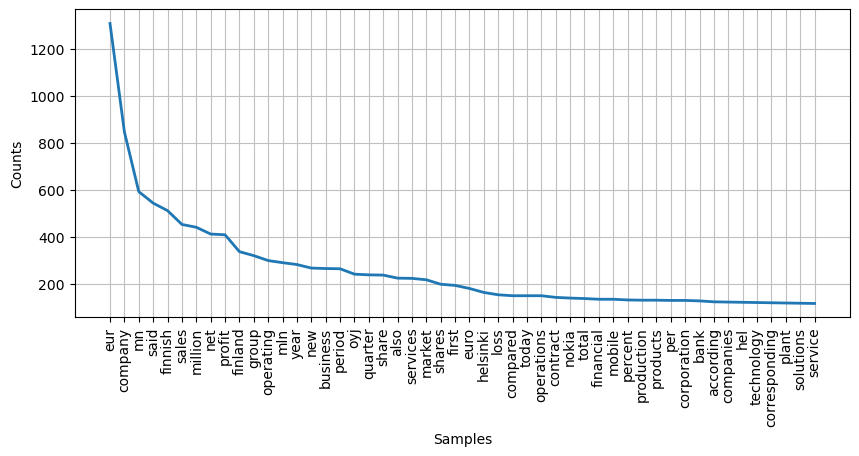

<Axes: xlabel='Samples', ylabel='Counts'>

In [18]:
#frequncy diagram of the most common tokens in our dataset
FreqData = FreqDist(w for w in tokenizedData)
plt.figure(figsize=(10,4))
FreqData.plot(50)

Based on the frequency distribution plot, it appears that a significant portion of the financial headlines originates from Europe, specifically focusing on the European market, and Finland seems to be at the core of these news articles.

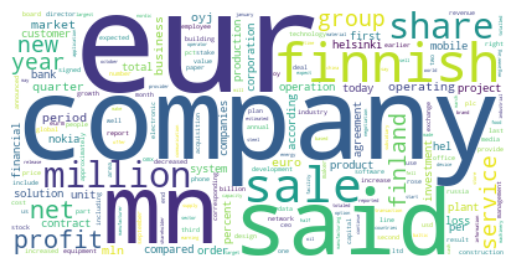

In [19]:
#MY ORIGINAL CODE/CONTRIBUTIONS
word_Cloud_Text = " ".join(tokenizedData)

#plotting a word using the WordCloud library
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(word_Cloud_Text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The above word cloud provides a more visual and readable representation of the frequency distribution diagram.

## 5.4 Text Representation

For this project, I have chosen the Bag of Words Model to represent the textual data at hand. The reason for this choice are as follows:

- Simplicity and Efficiency: The BoW model is relatively simple to implement and understand. It represents text data as a collection of words without considering the order or structure of the sentences. This simplicity makes it computationally efficient and scalable
<br>

- Suitability for Classification: The BoW model is well-suited for classification tasks, where the goal is to assign labels to input text data, this case, the financial news headlines and its respective sentiment. It works effectively with classifiers like Naive Bayes, Support Vector Machines (SVM), and Random Forests, making it a versatile choice for sentiment analysis.

In [21]:
#import's sklearn's CounteVectorizer to build the BoW
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

#convert the headlines column values into a list
headline_list = df['Headlines'].tolist()

count_Vect = CountVectorizer(max_features=200)
X = count_Vect.fit_transform(headline_list)
X = X.toarray()

In [22]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 2 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [21]:
y = df['sentiment'].tolist()

# 6 Baseline performance

As outlined in the objectives of the project, we aim to compare Supervised Learning against Lexicon Approach. Therefore, our baseline performance against which we will compare the performance of our classifer model, will be the Lexicon.

The lexicon chosen to perform sentiment analysis, has to be one that was built to cater financial news. Among the publicly available financial lexicons, I have selected the Loughran-McDonald Master Dictionary. It is a  lexicon specifically designed for sentiment analysis in financial text. Created by Timothy Loughran and Bill McDonald, these word lists categorize words commonly found in financial documents into positive and negative sentiment categories[6]. It was last updated on February 2024, suggesting that it is well maintained and up to date. It is also available for academic use. Another reason this lexicon was chosen, was that it outperformed other financial based lexicons such as Harvard IV-4 Dictionary, in this study conducted by Kostadin Mishev and colleagues[5].

The Loughran-McDonald Master Dictionary is available in CSV format. It will be downloaded and loaded into pandas, locally.

In [22]:
#load into pandas dataframe
df_Loughran_McDonald = pd.read_csv("Loughran-McDonald_MasterDictionary_1993-2023.csv")

In [23]:
df_Loughran_McDonald.head()

,Word,Seq_num,Word Count,Word Proportion,Average Proportion,Std Dev,Doc Count,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Complexity,Syllables,Source
0,AARDVARK,1,664,2.690000e-08,1.860000e-08,4.050000e-06,131,0,0,0,0,0,0,0,0,2,12of12inf
1,AARDVARKS,2,3,1.210000e-10,8.230000e-12,9.020000e-09,1,0,0,0,0,0,0,0,0,2,12of12inf
2,ABACI,3,9,3.640000e-10,1.110000e-10,5.160000e-08,7,0,0,0,0,0,0,0,0,3,12of12inf
3,ABACK,4,29,1.170000e-09,6.330000e-10,1.560000e-07,28,0,0,0,0,0,0,0,0,2,12of12inf
4,ABACUS,5,9349,3.790000e-07,3.830000e-07,3.460000e-05,1239,0,0,0,0,0,0,0,0,3,12of12inf


We now have to extract the labelled positive and negative words from the lexicon, into a list. The custom functions below will achieve just that.

In [24]:
#MY ORIGINAL CODE/CONTRIBUTIONS

#function to extract positive and negative words into a seperate list
def extractPositive(df):
    filtered_df = df_Loughran_McDonald[df_Loughran_McDonald["Positive"] != 0]

    word_column = filtered_df["Word"]
    column_ToList = word_column.tolist()
    positive_Words = [x.lower() for x in column_ToList]
    
    return positive_Words

def extractNegative(df):
    filtered_df = df_Loughran_McDonald[df_Loughran_McDonald["Negative"] != 0]

    word_column = filtered_df["Word"]
    column_ToList = word_column.tolist()
    negative_Words = [x.lower() for x in column_ToList]
    
    return negative_Words

In [25]:
positive_Words = extractPositive(df_Loughran_McDonald)
negative_Words = extractNegative(df_Loughran_McDonald)

Now that we have a list of positive and negative words from the lexicon, we can run the analysis of our financial news headlines.

For each row in the dataset, the functions below will analyse it for positive and negative words that are found in the lexicon, and create separate columns in the dataframe that houses the count of these words.

In [26]:
#MY ORIGINAL CODE/CONTRIBUTIONS

#function to calculate number of positive words in each row
def positiveWordsLexicon(sentence):
    pos_Word_Count = 0
    #tokenize first
    words = sentence.split()
    for word in words:
        if word in positive_Words:
            pos_Word_Count += 1
        
    return pos_Word_Count

#function to calculate number of negative words in each row
def negativeWordsLexicon(sentence):
    neg_Word_Count = 0
    #tokenize first
    words = sentence.split()
    for word in words:
        if word in negative_Words:
            neg_Word_Count += 1
        
    return neg_Word_Count

#function to label the sentiment
def sentimentLexicon(val):
    if val < 0:
        return -1
    if val > 0:
        return 1
    else:
        return 0

In [27]:
df['positiveWords'] = df['Headlines'].apply(positiveWordsLexicon)
df['negativeWords'] = df['Headlines'].apply(negativeWordsLexicon)

In [28]:
df.head()

,sentiment,Headlines,positiveWords,negativeWords
0,0,technopolis plan develop stage area le square ...,0,0
1,-1,international electronic industry company elco...,0,2
2,1,new production plant company would increase ca...,2,0
3,1,according company updated strategy year baswar...,0,0
4,1,financing aspocomp growth aspocomp aggressivel...,0,0


The final step will be to derive the label of the sentiment. If the lexical score is more than 0, its positive, which is 1. If it's less than 0, its negative, which is -1. A score of 0 will be classified as neutral.

In [29]:
#score of lexicon analysis
df['wordCount']= df['positiveWords'] - df['negativeWords']

In [30]:
df['lexiconSentiment'] = df['wordCount'].apply(sentimentLexicon)

We can now use the accuracy metric outlined in our methodolgy, to see how the Lexicon approach faired.

In [31]:
#importing sklearn accuracy score
from sklearn.metrics import accuracy_score

In [32]:
#MY ORIGINAL CODE/CONTRIBUTIONS
def lexiconAccuracy(truthColumn,predictedColumn):
    lexiconPrediction = predictedColumn.tolist()
    truth = truthColumn.tolist()
    return accuracy_score(truth,lexiconPrediction)

In [33]:
#MY ORIGINAL CODE/CONTRIBUTIONS
lexiconAnalyzer_Performance = lexiconAccuracy(df['sentiment'],df['lexiconSentiment'])

In [34]:
print(lexiconAnalyzer_Performance)

0.6246388774246802


62% will be the baseline performance score that will be used to compare the performance of the chosen approach in the next section.

# 7 Classification Approach

### <b>Features and Labels Selection:<b>

- <b>Label:</b> The label selected will consist of the values in the "Sentiment" column of our dataset. The sentiment values (1, -1, 0) provide clear polarity labels for sentiment analysis, making them suitable for the classifier's prediction task. It has already be pre-processed and represented as an array, suitable to be inserted into our model. Refer to 5.4.
<br>

- <b>Feature:</b> The feature that will be used is the textual data contained in the "Headlines" column. The news article headlines contain rich linguistic information that serves as valuable features for capturing sentiment. It has already been pre-processed and the textual features extracted into a Bag of Words, after applying NLP techniques to it. Refer to 5.2

### Chosen Approach: Random Forest

The rationale for my chosen approach of using the Random Forest classifier are as follows:
    
1. <b>Ensemble Learning:</b> Random Forest is an ensemble learning method that combines multiple decision trees. Ensemble meaning it uses multiple learning algorithms to achieve better outcomes, in this case, multiple decision trees. This ensemble approach can improve accuracy and reduce overfitting compared to a single decision tree.
    <br>
    
2. <b>Feature Importance:</b> Random Forest provides insights into feature importance, helping identify which words or phrases contribute most to sentiment analysis.
    <br>
    
3. <b>Handling High-Dimensional Data:</b> Random Forest can handle sparse data. The ease of fine-tuning allows for optimizing hyperparameters such as the tree depth, further enhancing its effectiveness in achieving better generalization of the data.

### Potential Benefits and Drawbacks of Alternative Approaches:

1. <b>Support Vector Machine (SVM):</b>
   - Benefits: It is effective in high-dimensional spaces and versatile and robust to overfitting in some cases.
   - Drawbacks: Computationally intensive for large datasets, sensitive to feature scaling, and less interpretable than decision tree-based methods. It's hyperparameter tuning is not as straightforward as Decision Trees, for example.
    <br>
    
2. <b>Naïve Bayes:</b>
   - Benefits: It is simple and not computationally expensive, and works well with small datasets. It can handle categorical data effectively.
   - Drawbacks: Assumes independence among features (naïve assumption), and  may not capture complex relationships well. It can be sensitive to outliers in the dataset as well.
<br> 
  
As highlighted above, each approach has its strengths and weaknesses, making the choice dependent on factors such as dataset size, complexity of relationships and computational resources available. Random Forest's ability to handle non-linearity, feature importance analysis, and ensemble learning make it well-suited for the project's objectives.

## 7.1 Base Model

In [23]:
#import machine learning model from sklearn
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Prepare the train test split for our model. Train-test split is a technique in machine learning where the dataset is divided into a training set, used to train the model, and a testing set, used to evaluate the model's performance on unseen data, helping assess its generalization capabilities and potential overfitting issues.

In [36]:
#using sklearn's train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [37]:
#using sklearn's model
base_Model = RandomForestClassifier()
base_Model.fit(X_train,y_train)
base_Prediction = base_Model.predict(X_test)

In [38]:
print(accuracy_score(y_test,base_Prediction))

0.6628865979381443


## 7.2 Hyperparameter Tuning

In [39]:
#MY ORIGINAL CODE/CONTRIBUTIONS

tuningOptions = {
    'n_estimators': [10,25,50, 100, 150,200,250,300,450,500,550],
    'max_depth': [3, 6, 9,12,24,32,64,105,150,200,250,300] 
}

accuracy_history = []

for i in range(0,10):
    model = RandomForestClassifier(n_estimators=tuningOptions['n_estimators'][i],
                                   max_depth=tuningOptions['max_depth'][i])
    model.fit(X_train,y_train)
    modelPrediction = model.predict(X_test)
    
    acc_score = accuracy_score(y_test,modelPrediction)
    accuracy_history.append(acc_score)

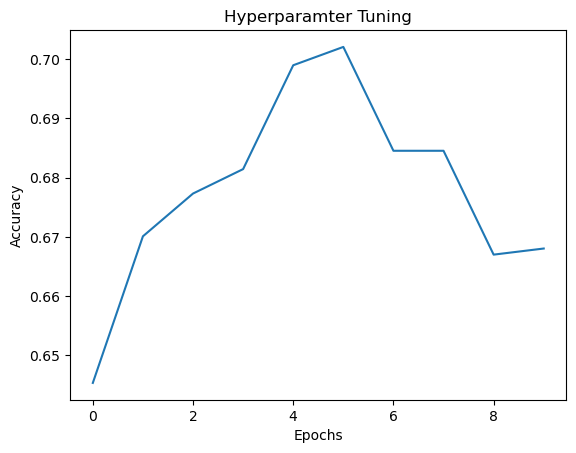

In [40]:
plt.plot(accuracy_history)
plt.title('Hyperparamter Tuning')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Past the fourth epoch, our model's accuracy beings to fall. We start to overfit. Hence, the ideal parameters for number of trees is 150, and 24 for the max depth.

## 7.3 Production Model

In [41]:
#using sklearn's model
classifier = RandomForestClassifier(n_estimators=150,max_depth=24)
classifier.fit(X_train,y_train)
classifier_Prediction = classifier.predict(X_test)

In [42]:
print(accuracy_score(y_test,classifier_Prediction))

0.7061855670103093


# 8 Evaluation

We have now built our text classifier model using Random Forest, and are ready to evaluate its financial text sentiment anaylsis performance, against the Lexicon Rule-Based approach. Refer to 6 to see the baseline benchmark.

To recap, lets see what the baseline performance was, the Loughran-McDonald Financial Lexicon.

In [43]:
lexiconAnalyzer_Performance

0.6246388774246802

Now, we will return the performance of the classifier.

In [44]:
print(accuracy_score(y_test,classifier_Prediction))

0.7061855670103093


Our text classifier model for sentiment anaylsis, achieved a 8% higher accuracy score than our Lexicon approach.

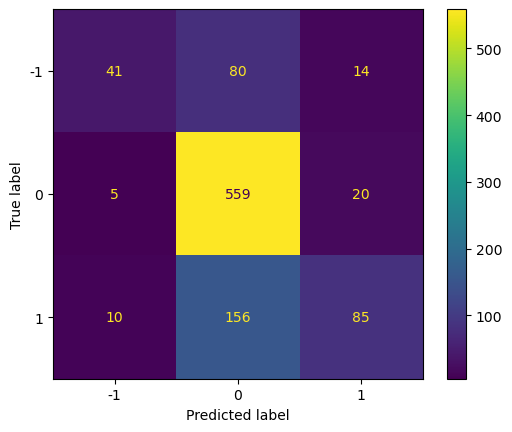

In [45]:
cm = confusion_matrix(y_test,classifier_Prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

From the confusion matrix, we can now calculate the precision score of the model, to see which labels it performed well and which it didnt.

In [50]:
#MY ORIGINAL CODE/CONTRIBUTIONS

negativePrecision = 41/(41+5+10) * 100
positivePrecision = 85/(85+20+14) * 100
neutralPrecision = 559/(559+156+80) * 100

In [51]:
print(negativePrecision)
print(positivePrecision)
print(neutralPrecision)

73.21428571428571
71.42857142857143
70.31446540880502


For all three sentiments, positive, negative and neutral, our model score 70%. There was no one label that the model was biased towards, or one that it failed to generalize.

To summarize:

- Supervised Machine Learning using Random Forest Classification, achieved a performance score of 70%, compared to the performance of a Lexicon which was our benchmark for the comparison, with a score of 62%.

- The machine learning model hyperparameter's had to be tuned in order to raise its default performance of 64% to 70%, wheareas the Lexicon analysis required no tuning at all.

- The Lexicon approach to financial news sentiment analysis was significantly faster than the classifier model.

# 9 Conclusion

By combining the Lexicon and Random Forest approaches, this project has pursued a comprehensive investigation into sentiment analysis methods, highlighting the project's originality and ambition as not much major literature and studies has been performed on such direct comparison between the two. Only one broad general overview of the latest approaches to financial sentiment analysis was done[5], without the specificity highlighted in this project. This dual approach adds novelty to my work, providing a clear comparison of techniques and benchmark scores that contribute to the problem area of financial news sentiment analysis. From this project, financial professionals such as investors and traders, can turn to one of the two approaches used in this study for financial news sentiment analysis, according to their needs. If speed and convenience is of importance, sentiment analysis using a ruled-based financial lexicon is the way to go. But if a large labelled dataset is available, then a supervised machine learning model may perform better.

Moreover, the findings from this project have broader implications, as they can be transferred to other domains beyond finance, such as marketing, customer feedback analysis, and social media monitoring. I believe the methods used in this project are replicable and adaptable, allowing others to apply similar techniques using different programming languages, development environments, and libraries like PyTorch or Keras. Overall, this project reflects not only my dedication to understanding sentiment analysis but also its potential to impact various industries with its transferable insights and replicable methods.

# 10 References

[1] S. Sohangir, N. Petty and D. Wang, "Financial Sentiment Lexicon Analysis," 2018 IEEE 12th International Conference on Semantic Computing (ICSC), Laguna Hills, CA, USA, 2018, pp. 286-289, doi: 10.1109/ICSC.2018.00052.

[2] Devlin, J., Chang, M., Lee, K., & Toutanova, K. (2019). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. North American Chapter of the Association for Computational Linguistics.

[3] Roopam Srivastava, P. K. Bharti and Parul Verma, “Comparative Analysis of Lexicon and Machine Learning Approach for Sentiment Analysis” International Journal of Advanced Computer Science and Applications(IJACSA), 13(3), 2022. http://dx.doi.org/10.14569/IJACSA.2022.0130312

[4] A. Agarwal, "Sentiment Analysis of Financial News," 2020 12th International Conference on Computational Intelligence and Communication Networks (CICN), Bhimtal, India, 2020, pp. 312-315, doi: 10.1109/CICN49253.2020.9242579

[5] K. Mishev, A. Gjorgjevikj, I. Vodenska, L. T. Chitkushev and D. Trajanov, "Evaluation of Sentiment Analysis in Finance: From Lexicons to Transformers," in IEEE Access, vol. 8, pp. 131662-131682, 2020, doi: 10.1109/ACCESS.2020.3009626

[6] Dame, M.C.W. // U. of N. (n.d.). Loughran-McDonald Master Dictionary w/ Sentiment Word Lists // Software Repository for Accounting and Finance // University of Notre Dame. [online] Software Repository for Accounting and Finance. Available at: https://sraf.nd.edu/loughranmcdonald-master-dictionary/